In [27]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# construct an unitary matrix
p = [3 * np.pi / 4, 2 * np.pi * 0.5, 2 * np.pi * 0.625, 3 * np.pi / 4] # 0.011, 0.100, 0.101
p_exp = [np.exp(complex(0,i)) for i in p]
U = np.diag(p_exp)
pd.DataFrame(U.reshape(4,4))

,0,1,2,3
0,-0.707107+0.707107j,0.0+0.0j,0.000000+0.000000j,0.000000+0.000000j
1,0.000000+0.000000j,-1.0+0.0j,0.000000+0.000000j,0.000000+0.000000j
2,0.000000+0.000000j,0.0+0.0j,-0.707107-0.707107j,0.000000+0.000000j
3,0.000000+0.000000j,0.0+0.0j,0.000000+0.000000j,-0.707107+0.707107j


In [3]:
# unitarity check
def is_unitary(matrix):
    m_dagger = np.conjugate(matrix.transpose()) # Get the conjugate transpose of the matrix
    identity = np.eye(matrix.shape[0]) # Create an identity matrix of the same size as the input matrix
    return np.allclose(np.dot(matrix, m_dagger), identity) # Check if the product of the matrix and its conjugate transpose is close to the identity matrix

# Example usage
matrix_1 = np.array([[1/np.sqrt(2), 1j/np.sqrt(2)], [1j/np.sqrt(2), 1/np.sqrt(2)]])
matrix_2 = np.array([[1, 1], [0, 1]])

print(f"Matrix 1 is unitary: {is_unitary(matrix_1)}")
print(f"Matrix 2 is unitary: {is_unitary(matrix_2)}")
print(f"Matrix U is unitary: {is_unitary(U)}")

Matrix 1 is unitary: True
Matrix 2 is unitary: False
Matrix U is unitary: True


4 [-0.70710678+0.70710678j  0.        +0.j          0.        +0.j
  0.        +0.j        ]


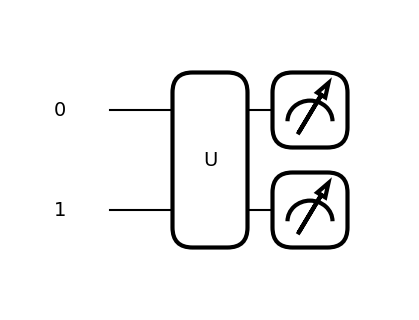

In [4]:
# to PennyLane object
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def applyU():
    qml.QubitUnitary(U, wires=[0,1])
    return qml.state()

print(len(applyU()), applyU())

fig, axs = qml.draw_mpl(applyU)()

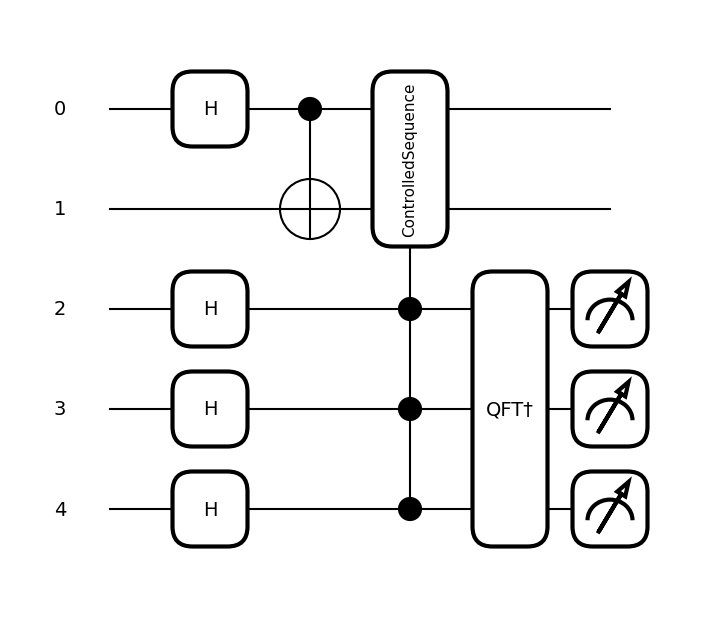

In [6]:
# def applyU(wires):
#     return qml.QubitUnitary(U, wires=wires)
#     return qml.state()

dev = qml.device("default.qubit")

@qml.qnode(dev)
def circuit_qpe(estimation_wires):
    # initialize to state |1>, which is an eigenvector of U
    # qml.PauliX(wires=0)
    qml.Hadamard(wires = 0) # the first Bell state
    qml.CNOT(wires=[0,1])

    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    qml.ControlledSequence(qml.QubitUnitary(U, wires=[0,1]), control=estimation_wires)

    qml.adjoint(qml.QFT)(wires=estimation_wires)

    return qml.probs(wires=estimation_wires)

estimation_wires = range(2, 5)
fig, axs = qml.draw_mpl(circuit_qpe)(estimation_wires)

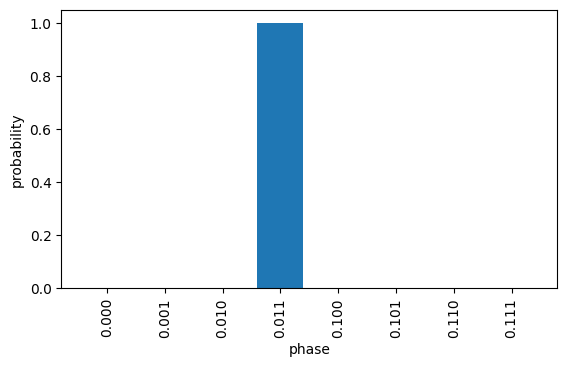

In [7]:
results = circuit_qpe(estimation_wires)

bit_strings = [f"0.{x:0{len(estimation_wires)}b}" for x in range(len(results))]

plt.bar(bit_strings, results)
plt.xlabel("phase")
plt.ylabel("probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()

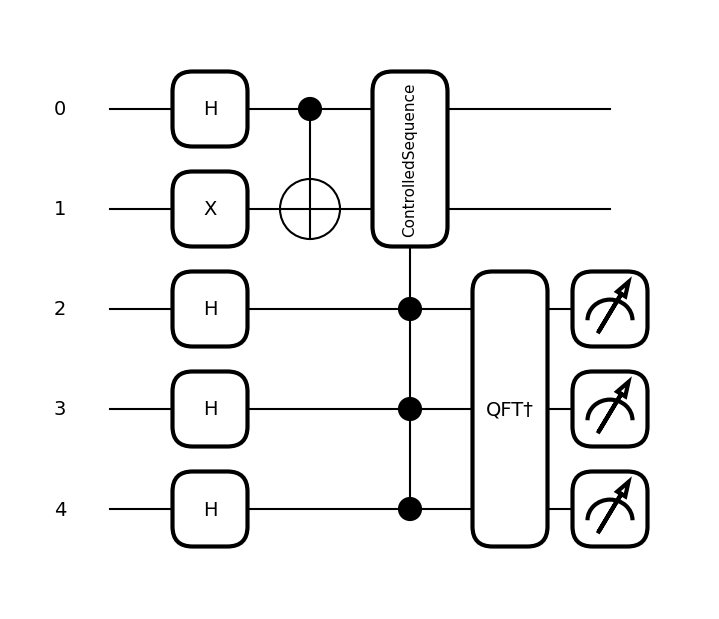

In [8]:
dev = qml.device("default.qubit")

@qml.qnode(dev)
def circuit_qpe(estimation_wires):
    # to the third Bell state
    qml.PauliX(wires=1)
    qml.Hadamard(wires = 0) 
    qml.CNOT(wires=[0,1])

    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    qml.ControlledSequence(qml.QubitUnitary(U, wires=[0,1]), control=estimation_wires)

    qml.adjoint(qml.QFT)(wires=estimation_wires)

    return qml.probs(wires=estimation_wires)
    
fig, axs = qml.draw_mpl(circuit_qpe)(estimation_wires)

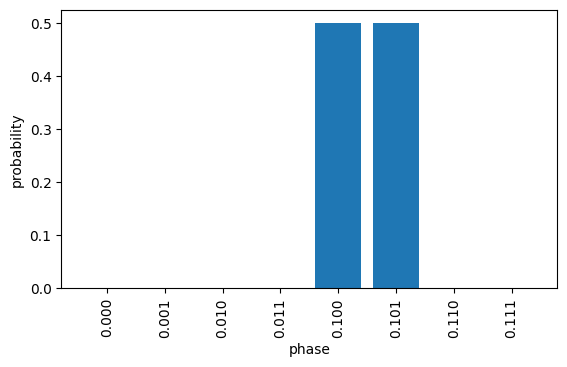

In [9]:
estimation_wires = range(2, 5)

results = circuit_qpe(estimation_wires)

bit_strings = [f"0.{x:0{len(estimation_wires)}b}" for x in range(len(results))]

plt.bar(bit_strings, results)
plt.xlabel("phase")
plt.ylabel("probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()

In [1]:
@qml.qnode(dev)
def circuit_qpe_state(estimation_wires):
    # to the third Bell state
    qml.PauliX(wires=1)
    qml.Hadamard(wires = 0) 
    qml.CNOT(wires=[0,1])

    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    qml.ControlledSequence(qml.QubitUnitary(U, wires=[0,1]), control=estimation_wires)

    qml.adjoint(qml.QFT)(wires=estimation_wires)

    return qml.density_matrix([2,3,4])

NameError: name 'qml' is not defined

In [ ]:
r = circuit_qpe_state(estimation_wires)
pd.DataFrame(r)

In [ ]:
r = circuit_qpe_state(estimation_wires)
# r = [np.linalg.norm(i) for i in r]
sns.heatmap(pd.DataFrame(r.real))
plt.show()

In [18]:
bit_strings_state = [f"0.{x:0{len(estimation_wires)}b}" for x in range(len(r))]
bit_strings_state

['0.000', '0.001', '0.010', '0.011', '0.100', '0.101', '0.110', '0.111']